In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import sqlite3
import sqlalchemy
import re


In [7]:
!ls

01_Chad_Nelsen_Surfrider_MMS_Surf_Simply_feature-1-992x661.jpg
2019_01_27_20_05_06_141000.pdf
604378608_WEILAND.SETH_U1_20181214063939.pdf
Albert Sweigart-Automate the Boring Stuff with Python_ Practical Programming for Total Beginners-No Starch Press (2015).epub
Alex Banayan-The Third Door_ The Wild Quest to Uncover How the World’s Most Successful People Launched Their Careers-Currency (2018).epub
Ashlee Vance - Elon Musk_ Tesla, SpaceX, and the Quest for a Fantastic Future-Ecco (2015).epub
Assignment1.docx
Assignment2-1.docx
Ben R. Rich, Leo Janos - Skunk Works_ A Personal Memoir of My Years at Lockheed-Little Brown & Co (T) (1994).epub
Ben R. Rich, Leo Janos - Skunk Works_ A Personal Memoir of My Years at Lockheed-Little Brown & Co (T) (1994).pdf
COMSC260_Ch3.lst
CRCL.docx
Charlie_Notebook_Active_At_AnyTime.pdf
Charlie_Time_Looks.ipynb
Chris Anley, John Heasman, Felix Lindner, Gerardo Richarte - The Shellcoder's Handbook_ Discovering and Exploiting Security Holes-Wiley (2007).pdf
Co

In [8]:
df_raw = pd.read_csv("Speed_Camera_Violations.csv")

In [9]:
df_raw.columns

Index(['ADDRESS', 'CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS', 'X COORDINATE',
       'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [10]:
df_raw.head()

ADDRESS CAMERA ID VIOLATION DATE  VIOLATIONS  X COORDINATE  \
0   7738 S WESTERN    CHI065     07/08/2014          65           NaN   
1  1111 N HUMBOLDT    CHI010     07/16/2014          56           NaN   
2   5520 S WESTERN    CHI069     07/08/2014          10           NaN   
3  1111 N HUMBOLDT    CHI010     07/26/2014         101           NaN   
4  1111 N HUMBOLDT    CHI010     07/27/2014          92           NaN   

   Y COORDINATE  LATITUDE  LONGITUDE LOCATION  
0           NaN       NaN        NaN      NaN  
1           NaN       NaN        NaN      NaN  
2           NaN       NaN        NaN      NaN  
3           NaN       NaN        NaN      NaN  
4           NaN       NaN        NaN      NaN

In [11]:
df_raw.columns

Index(['ADDRESS', 'CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS', 'X COORDINATE',
       'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [12]:
df_raw.shape

(170521, 9)

In [13]:
df_raw.isnull().sum()

ADDRESS              0
CAMERA ID            0
VIOLATION DATE       0
VIOLATIONS           0
X COORDINATE      6562
Y COORDINATE      6562
LATITUDE          6562
LONGITUDE         6562
LOCATION          6562
dtype: int64

In [14]:
df_null_xy= df_raw[df_raw['X COORDINATE'].isnull()].copy()

In [15]:
df_null_xy=df_null_xy.reset_index()

In [16]:
df_null_xy['ADDRESS'].value_counts()

5520 S WESTERN     1632
1111 N HUMBOLDT    1626
5529 S WESTERN     1613
7738 S WESTERN      850
7739 S WESTERN      841
Name: ADDRESS, dtype: int64

It seems the values in our data with null x and y coordinates belong to the data associated with five unique camera IDs, yet based on address numbers it seems that this is more likely to be three unique intersections, will exclude these values later when doing a geographical plot. 

In [17]:
df_null_xy['CAMERA ID'].value_counts()

CHI069    1632
CHI010    1626
CHI068    1613
CHI065     850
CHI064     841
Name: CAMERA ID, dtype: int64

This Groupby Statement gives us the top violations by camera per day, however as the four cells beneath it show, it is calculating the average with the denominator being only days where at least one person was caught, so if a camera had days where it caught zero people, this would not be factored into the average violations below

In [18]:
pd.options.display.max_rows=200

In [19]:
df_raw.groupby('CAMERA ID').agg('mean').sort_values(by='VIOLATIONS', ascending=False)

VIOLATIONS  X COORDINATE  Y COORDINATE   LATITUDE  LONGITUDE
CAMERA ID                                                              
CHI149     197.048473  1.143501e+06  1.932251e+06  41.970135 -87.747724
CHI045     146.775926  1.175468e+06  1.820629e+06  41.663174 -87.633520
CHI003     116.335859  1.147853e+06  1.934275e+06  41.975605 -87.731670
CHI021     116.066912  1.157136e+06  1.892362e+06  41.860408 -87.698672
CHI174     114.339130  1.121895e+06  1.922706e+06  41.944319 -87.827378
CHI120     102.820999  1.203645e+06  1.837056e+06  41.707577 -87.529848
CHI079      98.286683  1.157555e+06  1.926426e+06  41.953875 -87.696204
CHI146      84.713115  1.178877e+06  1.863251e+06  41.780057 -87.619755
CHI095      79.740012  1.167790e+06  1.926747e+06  41.954541 -87.658573
CHI029      77.253676  1.180985e+06  1.868165e+06  41.793493 -87.611876
CHI058      74.731316  1.137565e+06  1.898341e+06  41.877189 -87.770370
CHI184      74.446809  1.182951e+06  1.857908e+06  41.765301 -87.604985
CHI028      67.848101  1.158541e+06  1.923785e+06  41.946608 -87.692652
CHI147      66.336920  1.143138e+06  1.931435e+06  41.967902 -87.749079
CHI144      63.112534  1.165345e+06  1.883514e+06  41.835958 -87.668790
CHI007      59.697837  1.161038e+06  1.878964e+06  41.823564 -87.684721
CHI031      58.457074  1.150513e+06  1.870811e+06  41.801402 -87.723545
CHI014      58.330670  1.156276e+06  1.858583e+06  41.767732 -87.702738
CHI182      58.250000  1.166307e+06  1.908050e+06  41.903268 -87.664557
CHI010      55.978475           NaN           NaN        NaN        NaN
CHI119      48.679975  1.168211e+06  1.868328e+06  41.794226 -87.658710
CHI009      46.374004  1.151845e+06  1.899805e+06  41.880938 -87.717898
CHI083      45.926471  1.133995e+06  1.925971e+06  41.953075 -87.782826
CHI013      43.584568  1.182453e+06  1.869712e+06  41.797704 -87.606445
CHI024      43.347826  1.154183e+06  1.939669e+06  41.990282 -87.708245
CHI027      42.721631  1.159704e+06  1.923559e+06  41.945963 -87.688384
CHI121      42.637868  1.168445e+06  1.868118e+06  41.793645 -87.657861
CHI018      41.265596  1.156183e+06  1.859145e+06  41.769276 -87.703063
CHI091      40.886769  1.165293e+06  1.916479e+06  41.926419 -87.668042
CHI044      40.446321  1.143534e+06  1.915478e+06  41.924106 -87.748023
CHI019      40.185117  1.156992e+06  1.894531e+06  41.866364 -87.699143
CHI173      40.184932  1.161334e+06  1.871365e+06  41.802706 -87.683845
CHI077      39.200741  1.166485e+06  1.900735e+06  41.883192 -87.664115
CHI100      39.082437  1.161264e+06  1.871171e+06  41.802174 -87.684107
CHI143      38.980796  1.166927e+06  1.889555e+06  41.852502 -87.662810
CHI115      37.573298  1.143859e+06  1.939423e+06  41.989808 -87.746226
CHI108      37.510441  1.149150e+06  1.905073e+06  41.895449 -87.727658
CHI051      37.135218  1.159169e+06  1.943342e+06  42.000260 -87.689803
CHI004      34.781192  1.148759e+06  1.933818e+06  41.974333 -87.728347
CHI050      34.032156  1.139043e+06  1.926097e+06  41.953330 -87.764267
CHI127      33.835634  1.160223e+06  1.908226e+06  41.903878 -87.686903
CHI169      32.552524  1.167083e+06  1.849460e+06  41.742474 -87.663385
CHI102      31.250000  1.139072e+06  1.931898e+06  41.969247 -87.764019
CHI142      30.476456  1.202075e+06  1.841845e+06  41.720757 -87.535437
CHI093      30.179067  1.165004e+06  1.939248e+06  41.988904 -87.668456
CHI160      30.117093  1.149437e+06  1.894438e+06  41.866257 -87.726879
CHI026      29.622984  1.159788e+06  1.923418e+06  41.945574 -87.688078
CHI158      29.301351  1.131748e+06  1.936860e+06  41.982995 -87.790832
CHI180      29.145833  1.183268e+06  1.857719e+06  41.764775 -87.603828
CHI064      28.313912           NaN           NaN        NaN        NaN
CHI181      27.836735  1.182997e+06  1.858058e+06  41.765711 -87.604810
CHI168      26.908591  1.167170e+06  1.849194e+06  41.741742 -87.663073
CHI145      26.124372  1.191795e+06  1.847666e+06  41.736987 -87.572901
CHI080      24.905649  1.157448e+06  1.926505e+06  

In [20]:
#number of days the top camera(in terms of violations)had recorded violations
df_raw[df_raw['CAMERA ID']=='CHI149']['VIOLATIONS'].count()

1506

In [21]:
#total number violations over the recording period for same camera above
df_raw[df_raw['CAMERA ID']=='CHI149']['VIOLATIONS'].sum()

296755

In [22]:
296755/1506
#the top value for citations a day in our groupby/agg query

197.04847277556442

In [23]:
df_raw[df_raw['VIOLATIONS']==0]
#our data does include rows for days when a specific camera caught 0 violators. 

Empty DataFrame
Columns: [ADDRESS, CAMERA ID, VIOLATION DATE, VIOLATIONS, X COORDINATE, Y COORDINATE, LATITUDE, LONGITUDE, LOCATION]
Index: []

In [24]:
df_raw[df_raw['CAMERA ID']=='CHI131'].sort_values(by='VIOLATION DATE')

ADDRESS CAMERA ID VIOLATION DATE  VIOLATIONS  X COORDINATE  \
57254   18 W SUPERIOR ST    CHI131     01/04/2016           1  1.176030e+06   
5324    18 W SUPERIOR ST    CHI131     01/05/2015           2  1.176030e+06   
57302   18 W SUPERIOR ST    CHI131     01/06/2016           1  1.176030e+06   
57194   18 W SUPERIOR ST    CHI131     01/08/2016           1  1.176030e+06   
123629  18 W SUPERIOR ST    CHI131     01/09/2018           1  1.176030e+06   
123733  18 W SUPERIOR ST    CHI131     01/11/2018           1  1.176030e+06   
17952   18 W SUPERIOR ST    CHI131     01/12/2015           2  1.176030e+06   
18236   18 W SUPERIOR ST    CHI131     01/14/2015           3  1.176030e+06   
18348   18 W SUPERIOR ST    CHI131     01/15/2015           1  1.176030e+06   
124128  18 W SUPERIOR ST    CHI131     01/17/2018           2  1.176030e+06   
124308  18 W SUPERIOR ST    CHI131     01/18/2018           1  1.176030e+06   
57197   18 W SUPERIOR ST    CHI131     01/20/2016           1  1.176030e+06   
18948   18 W SUPERIOR ST    CHI131     01/21/2015           4  1.176030e+06   
57260   18 W SUPERIOR ST    CHI131     01/21/2016           1  1.176030e+06   
124736  18 W SUPERIOR ST    CHI131     01/22/2018           1  1.176030e+06   
125019  18 W SUPERIOR ST    CHI131     01/24/2018           1  1.176030e+06   
19491   18 W SUPERIOR ST    CHI131     01/26/2015           2  1.176030e+06   
19557   18 W SUPERIOR ST    CHI131     01/27/2015           1  1.176030e+06   
19977   18 W SUPERIOR ST    CHI131     01/29/2015           1  1.176030e+06   
19825   18 W SUPERIOR ST    CHI131     01/30/2015           3  1.176030e+06   
121178  18 W SUPERIOR ST    CHI131     01/30/2018           1  1.176030e+06   
122152  18 W SUPERIOR ST    CHI131     01/31/2018           1  1.176030e+06   
58356   18 W SUPERIOR ST    CHI131     02/01/2016           1  1.176030e+06   
123754  18 W SUPERIOR ST    CHI131     02/01/2018           1  1.176030e+06   
117871  18 W SUPERIOR ST    CHI131     02/02/2018           2  1.176030e+06   
20815   18 W SUPERIOR ST    CHI131     02/09/2015           1  1.176030e+06   
59273   18 W SUPERIOR ST    CHI131     02/09/2016           2  1.176030e+06   
21841   18 W SUPERIOR ST    CHI131     02/18/2015           1  1.176030e+06   
60346   18 W SUPERIOR ST    CHI131     02/18/2016           1  1.176030e+06   
22018   18 W SUPERIOR ST    CHI131     02/19/2015           1  1.176030e+06   
144295  18 W SUPERIOR ST    CHI131     02/22/2018           2  1.176030e+06   
22674   18 W SUPERIOR ST    CHI131     02/25/2015           1  1.176030e+06   
61219   18 W SUPERIOR ST    CHI131     02/25/2016           1  1.176030e+06   
22815   18 W SUPERIOR ST    CHI131     02/26/2015           1  1.176030e+06   
61305   18 W SUPERIOR ST    CHI131     02/26/2016           1  1.176030e+06   
23067   18 W SUPERIOR ST    CHI131     03/02/2015           2  1.176030e+06   
61920   18 W SUPERIOR ST    CHI131     03/02/2016           1  1.176030e+06   
62401   18 W SUPERIOR ST    CHI131     03/07/2016           1  1.176030e+06   
62628   18 W SUPERIOR ST    CHI131     03/08/2016           1  1.176030e+06   
24197   18 W SUPERIOR ST    CHI131     03/10/2015           1  1.176030e+06   
24367   18 W SUPERIOR ST    CHI131     03/11/2015           1  1.176030e+06   
63420   18 W SUPERIOR ST    CHI131     03/15/2016           1  1.176030e+06   
63591   18 W SUPERIOR ST    CHI131     03/16/2016           2  1.176030e+06   
25112   18 W SUPERIOR ST    CHI131     03/18/2015           1  1.176030e+06   
63902   18 W SUPERIOR ST    CHI131     03/18/2016           1  1.176030e+06   
25433   18 W SUPERIOR ST    CHI131     03/20/2015           1  1.176030e+06   
144400  18 W SUPERIOR ST    CHI131     03/21/2018           1  1.176030e+06   
64372   18 W SUPERIOR ST    CHI131     03/23/2016           1  1.176030e+06   
25838   18 W SUPERIOR ST    CHI131     03/24/2015           1  1.176030e+06   
26127   18 W SUPERIOR ST    CHI131     03/26/2015           1  1.17

In [25]:
df_raw.dtypes

ADDRESS            object
CAMERA ID          object
VIOLATION DATE     object
VIOLATIONS          int64
X COORDINATE      float64
Y COORDINATE      float64
LATITUDE          float64
LONGITUDE         float64
LOCATION           object
dtype: object

In [26]:
df_raw['VIOLATION DATE']=pd.to_datetime(df_raw['VIOLATION DATE'], infer_datetime_format=True)


In [27]:
df_raw.dtypes

ADDRESS                   object
CAMERA ID                 object
VIOLATION DATE    datetime64[ns]
VIOLATIONS                 int64
X COORDINATE             float64
Y COORDINATE             float64
LATITUDE                 float64
LONGITUDE                float64
LOCATION                  object
dtype: object

In [28]:
#create a day of week column
df_raw['day_of_week'] = df_raw['VIOLATION DATE'].dt.weekday_name

In [29]:
df_raw.columns

Index(['ADDRESS', 'CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS', 'X COORDINATE',
       'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'day_of_week'],
      dtype='object')

Will probably convert these day_of_week to categorical later in case want to do a random forest, but for now using to display aggregates 

In [30]:
engine = sqlalchemy.create_engine('sqlite://')
df_raw.to_sql('df_sql', con=engine)

In [31]:
df_raw['day_of_week'].value_counts().sort_values(ascending=False)


Tuesday      28214
Wednesday    27545
Thursday     27456
Monday       26674
Friday       26635
Saturday     17006
Sunday       16991
Name: day_of_week, dtype: int64

In [32]:
df_most_by_weekday = pd.DataFrame(df_raw['day_of_week'].value_counts()/(1636/7))
df_most_by_weekday.reset_index(inplace=True)
df_most_by_weekday.columns=['day_of_week', 'average_num_per_day']
df_most_by_weekday



day_of_week  average_num_per_day
0     Tuesday           120.720049
1   Wednesday           117.857579
2    Thursday           117.476773
3      Monday           114.130807
4      Friday           113.963936
5    Saturday            72.764059
6      Sunday            72.699878

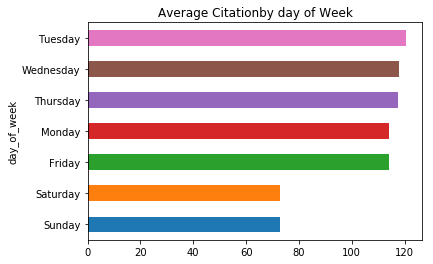

In [33]:
df_most_by_weekday.sort_values('average_num_per_day', ascending=True).plot('day_of_week', 'average_num_per_day', kind='barh', legend=False, title='Average Citationby day of Week')



Make a plot to show citations by geographic area

In [34]:
#this function will convert latitudes and longitudes to x, y mercator coordinates
import math 
from ast import literal_eval
def merc(Coords):
    Coordinates=literal_eval(Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

Remove the roughly 6500 rows that have null location values for our geo-graphing purposes. 

In [35]:
df_geo_graph = df_raw[df_raw['LOCATION'].isnull()==False].copy()
df_geo_graph.head()

ADDRESS CAMERA ID VIOLATION DATE  VIOLATIONS  X COORDINATE  \
148    2912 W ROOSEVELT    CHI020     2014-10-16          25  1.157040e+06   
149       346 W 76th ST    CHI136     2014-10-16           4  1.175112e+06   
150   11153 S VINCENNES    CHI022     2014-10-16           6  1.167029e+06   
151  5454 W IRVING PARK    CHI050     2014-10-16          82  1.139043e+06   
152    5446 W FULLERTON    CHI042     2014-10-16          38  1.139460e+06   

     Y COORDINATE   LATITUDE  LONGITUDE  \
148  1.894612e+06  41.866585 -87.698962   
149  1.854590e+06  41.756374 -87.633817   
150  1.830594e+06  41.690702 -87.664122   
151  1.926097e+06  41.953330 -87.764267   
152  1.915458e+06  41.924128 -87.762994   

                                     LOCATION day_of_week  
148   (41.86658528313424, -87.69896237494204)    Thursday  
149     (41.7563743554102, -87.6338165847716)    Thursday  
150  (41.690701951255015, -87.66412238501842)    Thursday  
151   (41.95332954454448, -87.76426726425451)    Thursday  
152   (41.92412849125162, -87.76299399881007)    Thursday

In [36]:
df_geo_graph['x_coord']=df_geo_graph['LOCATION'].apply(lambda x: merc(x)[0])
df_geo_graph['y_coord']=df_geo_graph['LOCATION'].apply(lambda x: merc(x)[1])

Bokeh needs x, and y coordinates, not latitude and longitudes, the above function can make this conversion for us. 

In [37]:
merc(df_raw['LOCATION'][10000])

(-9770552.839675128, 5142600.72788678)

In [38]:
df_geo_graph['x_coord'].value_counts()

-9.752909e+06    1632
-9.758028e+06    1632
-9.771939e+06    1632
-9.760198e+06    1632
-9.764712e+06    1631
-9.761299e+06    1630
-9.762572e+06    1629
-9.758123e+06    1628
-9.765875e+06    1627
-9.761584e+06    1627
-9.763024e+06    1627
-9.758108e+06    1627
-9.762624e+06    1626
-9.762604e+06    1626
-9.759162e+06    1625
-9.764742e+06    1624
-9.763403e+06    1623
-9.762297e+06    1622
-9.748951e+06    1621
-9.749196e+06    1621
-9.752305e+06    1620
-9.755319e+06    1620
-9.770553e+06    1619
-9.758725e+06    1619
-9.763060e+06    1619
-9.761446e+06    1618
-9.763802e+06    1617
-9.759484e+06    1616
-9.769846e+06    1616
-9.744400e+06    1614
-9.771901e+06    1613
-9.771919e+06    1613
-9.757715e+06    1612
-9.762340e+06    1611
-9.763048e+06    1610
-9.761479e+06    1606
-9.753965e+06    1604
-9.769895e+06    1601
-9.759050e+06    1596
-9.759194e+06    1595
-9.769836e+06    1589
-9.763637e+06    1587
-9.769874e+06    1586
-9.759208e+06    1586
-9.766245e+06    1584
-9.743778e

In [39]:
dict_x_coord_total = dict(df_geo_graph['x_coord'].value_counts())

In [40]:
#we will .apply() this as a lambda function to create a new column "count_per_location"
def count_per_location(location):
    return dict_x_coord_total[location]
    

In [41]:
df_geo_graph['count_per_location'] = df_geo_graph['x_coord'].apply(lambda x: count_per_location(x))


In [42]:
df_geo_graph

ADDRESS CAMERA ID VIOLATION DATE  VIOLATIONS  \
148              2912 W ROOSEVELT    CHI020     2014-10-16          25   
149                 346 W 76th ST    CHI136     2014-10-16           4   
150             11153 S VINCENNES    CHI022     2014-10-16           6   
151            5454 W IRVING PARK    CHI050     2014-10-16          82   
152              5446 W FULLERTON    CHI042     2014-10-16          38   
153            6443 W BELMONT AVE    CHI105     2014-10-16           3   
154            2712 W IRVING PARK    CHI080     2017-05-27          42   
155            4123 N CENTRAL AVE    CHI049     2014-10-16          20   
156             11144 S VINCENNES    CHI023     2014-10-16          27   
157                4432 N LINCOLN    CHI056     2014-10-16           1   
158            3810 W BELMONT AVE    CHI089     2014-10-16           3   
159                3535 E 95TH ST    CHI140     2014-10-16           1   
160                     62 E 95TH    CHI036     2014-10-16           6   
161           4674 W PETERSON AVE    CHI116     2014-10-16          13   
162                3542 E 95TH ST    CHI141     2014-10-16           2   
163           4707 W PETERSON AVE    CHI115     2014-10-16          31   
164             449 N COLUMBUS DR    CHI124     2014-10-16           9   
165              14 W CHICAGO AVE    CHI139     2014-10-16           5   
166                2432 N ASHLAND    CHI092     2014-10-16           6   
167              9618 S EWING AVE    CHI142     2014-10-16          23   
168             450 N COLUMBUS DR    CHI125     2014-10-16          23   
169                5816 W JACKSON    CHI058     2014-10-16          67   
170                2928 S HALSTED    CHI117     2014-10-16           3   
172            1226 N WESTERN AVE    CHI128     2014-10-16          18   
173            4040 W CHICAGO AVE    CHI108     2014-10-16          67   
175                   630 S STATE    CHI034     2014-10-16           9   
177                   2513 W 55TH    CHI070     2014-10-16          12   
178          3230 N MILWAUKEE AVE    CHI087     2014-10-16           3   
179                  5440 W GRAND    CHI043     2014-10-16          20   
180               2721 W MONTROSE    CHI078     2014-10-16           6   
181                  2900 W OGDEN    CHI021     2014-10-16         132   
182                 4965 S ARCHER    CHI032     2014-10-16          28   
183             319 E ILLINOIS ST    CHI126     2014-10-16           2   
186                 3034 W FOSTER    CHI025     2014-10-16          14   
187       3115 N NARRAGANSETT AVE    CHI104     2014-10-16           4   
188                3535 E 95TH ST    CHI140     2017-05-27           3   
189                 341 W 76th ST    CHI137     2014-10-16           1   
190             506 S CENTRAL AVE    CHI130     2014-10-16           1   
191                   115 N OGDEN    CHI077     2014-10-16          65   
194                7422 S JEFFERY    CHI101     2017-05-27          17   
195              732 N PULASKI RD    CHI109     2014-10-16          25   
196             515 S CENTRAL AVE    CHI057     2014-10-16           1   
197                2549 W ADDISON    CHI028     2014-10-16          86   
198              324 S KEDZIE AVE    CHI123     2014-10-16           7   
199                3534 N WESTERN    CHI027     2014-10-16          20   
200                 141 N ASHLAND    CHI075     2014-10-16          29   
201                   3832 W 79TH    CHI074     2014-10-16          18   
203              6247 W FULLERTON    CHI039     2014-10-16          27   
204             6125 N CICERO AVE    CHI114     2014-10-16          43   
205                   445 W 127TH    CHI045     2017-05-27         187   
206             5420 S RACINE AVE    CHI118     2014-10-16          13   
208            3809 W BELMONT AVE    CHI088     2014-10-16          12   
209              7518 S VINCENNES    CHI063     2014-10-16          38   
210                   3450 W 7

In [43]:
df_geo_graph['x_coord']=df_geo_graph['LOCATION'].apply(lambda x: merc(x)[0])
df_geo_graph['y_coord']=df_geo_graph['LOCATION'].apply(lambda x: merc(x)[1])



In [44]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON

In [45]:
p = figure(x_axis_type='mercator', y_axis_type='mercator')
p.add_tile(CARTODBPOSITRON)
p.circle(x=df_geo_graph['x_coord'], y=df_geo_graph['y_coord'], size=df_geo_graph['count_per_location']/100, line_color="#FF0000", fill_color="#FF0000", fill_alpha=0.5)
output_notebook()


Loading BokehJS ...

In [46]:
show(p)

Below I gave a little context for myself and the reader with a population heat maps and an economic hardship heat map. Hard to discern anything from the socio-economic map but it does seem that high-number violation cameras are clustered in more populated areas of the city. 

In [47]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename='chicago_population.png', width=400, height=400)

FileNotFoundError: [Errno 2] No such file or directory: 'chicago_population.png'

In [ ]:
!ls

In [ ]:
Image(filename='chicago-econ-hardship.jpg', width=400, height=400)


In [ ]:
df_geo_graph['LONGITUDE'].min()

In [ ]:
!ls

Investigate the number of active cameras over time, I am going to use whether a given camera had any violations as a proxy for whether it was active or not. Over a period of a couple days one camera might have been active but not have caught any violations, but if over say several months a camera does not have any violations caught, we could assume that it is no longer active. If we see that the average number of cameras catching violations changes we can use this as a proxy for the number of active cameras changing. 

In [ ]:
df_raw.head()

Due to the large difference in violations on weekdays vs. weekends, I am going to seperate the two and make scatter plots of weekdays an weekends over time in order to track active camera count, otherwise the graph would not tell as clear a story. 

In [ ]:
df_weekend = pd.read_sql_query('SELECT * FROM df_sql WHERE day_of_week="Sunday" OR day_of_week="Saturday"',con=engine)
df_weekend

In [ ]:
df_weekday = pd.read_sql_query('SELECT * FROM df_sql WHERE day_of_week IN ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday")',con=engine)
df_weekday

In [ ]:
df_to_graph_end.dtypes

In [ ]:
df_to_graph_end = pd.DataFrame(df_weekend['VIOLATION DATE'].value_counts().sort_values(ascending=True).sort_index().reset_index())
df_to_graph_end.columns = ['VIOLATION DATE', 'NUMBER ACTIVE']
df_to_graph_end['VIOLATION DATE'] = pd.to_datetime(df_to_graph_end['VIOLATION DATE'])
df_to_graph_end['day_of_week'] = df_to_graph_end['VIOLATION DATE'].dt.weekday_name

df_to_graph_end


For the weekend number of cameras catching violations, it seems there is a positive linear relationship with the number of violations as time has progressed. 

In [ ]:
plt.plot(df_to_graph_end['VIOLATION DATE'], df_to_graph_end['NUMBER ACTIVE'])
plt.ylim(50,80)
plt.show()

In [ ]:
df_to_graph_day = pd.DataFrame(df_weekday['VIOLATION DATE'].value_counts().sort_values(ascending=True).sort_index().reset_index())
df_to_graph_day.columns = ['VIOLATION DATE', 'NUMBER ACTIVE']
df_to_graph_day['VIOLATION DATE'] = pd.to_datetime(df_to_graph_day['VIOLATION DATE'])
df_to_graph_day['day_of_week'] = df_to_graph_day['VIOLATION DATE'].dt.weekday_name
df_to_graph_day

In [ ]:
plt.plot(df_to_graph_day['VIOLATION DATE'],df_to_graph_day['NUMBER ACTIVE'])


With weekdays it is difficult to discern a linear relationship from the graph as to the number of active cameras over time when we look at data poitns from individual day, I will now aggregate/bin together by month to see if that paints a clearer picture. 

In [ ]:
df_to_graph_day['Monthyr'] = df_to_graph_day['VIOLATION DATE'].dt.year.astype(int)*10+df_to_graph_day['VIOLATION DATE'].dt.month.astype(int) 
df_to_graph_day.head()

In [ ]:
df_bin_day_graph = df_to_graph_day.groupby('Monthyr').agg('mean').reset_index().copy()
df_bin_day_graph

In [ ]:
plt.scatter(df_bin_day_graph['Monthyr'],df_bin_day_graph['NUMBER ACTIVE'])



This graph is interesting in that it seems there are repeated instances of two months per year that have significantly lower numbers of cameras catching violators. If we look at the lowest months by average numbers of cameras catching violations per day,(i.e. number active), we see that the summer months of July and August make up the lowest 10 months, and that the next three lowest are June, which are not as large of outliers as July and August but still low figures. Definitely something that would be interesting to dive deeper into is why the summer months see a drop in the average number of cameras catching violators per day, I am just limited for time right now. 

In [ ]:
df_bin_day_graph.sort_values('NUMBER ACTIVE', ascending=True)